# Music
<img src="Music/Y4_Large_reduc.jpg" align="right" width="64" height="64" />

Zen's Music Playround

# Introduction

This page contains some experiments with Jupyter and playing with my music collection. To play happily, we have divided this page into multiple sections.

These sections are:
* [Setup](#Setup "Load the Music Library class and variables")
* [Get random albums](#Random-Albums "Get 5 random albums")
* [Get random album and cover](#Random-Album-and-Cover "Get a random album and it's track listing.")
* [SVG Demo](#SVG-Demo)

For useful help, you can check out:
* The [Jupyter Widget List](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html)


## Setup

Execute the cell below to instantiate the MusicLib class and make it available as *lib*.

In [12]:
from os import listdir
from os.path import join, isdir, exists, basename
from random import sample
from glob import glob
import ipywidgets as widgets
from IPython.core.display import HTML, display
from textwrap import dedent
import codecs

class Templates(object):
    """
    This class defines varios HTML templates as constants from output in
    the MusicLib class.
    """
    @staticmethod
    def get_album():
        """
        Return the HTML for an album template. The template has placeholders
        for 'artist', 'album' and 'tracks'.
        """
        return dedent('''
            <table>
                <tr>
                  <th><b>{artist}</b></th>
                  <th><b>{album}</b></th>
                </tr>
                <tr>
                  <td>{cover}</td>
                  <td>{tracks}</td>
                </tr>            
            </table>
        ''')
    
    @staticmethod
    def get_image():
        """
        Return the HTML for the album cover with a placeholder for
        'base64'
        """
        return '<img alt="Image" src="data:image/png;base64,{base64}"'\
            ' width="300px" height="300px" />'
    
class MusicLib(object):
    """
    Class for fetching information about our music library, as an experiment
    in jupyter
    """

    def __init__(self, path):
        self.path = path 
    
    def artists(self):
        """ Return a list of lartists. """
        return [name for name in listdir(self.path) if isdir(join(self.path, name))]

    def get_random_artists(self, number):
        """ Return a random list of *number* artists. """
        artists = self.artists()
        return sample(artists, number)

    def get_random_albums(self, artist, number):
        """ Return a random list of *number* albums by *artist*. """
        albums = self.albums(artist)
        return sample(albums, number)

    def albums(self, artist):
        """ Return a list of albums for the *artist*. """
        path = join(self.path, artist)
        return [name for name in listdir(path) if isdir(join(path, name))]
    
    def get_album_cover(self, artist, album, size=300):
        """
        Return the album cover for the specified album. Return an IPython widget
        if path is False, otherwise it returns the full fiel path.
        """
        path = join(self.path, artist, album)
        pattern = "cover.*"
        matches = glob(join(path, pattern))
        if matches:
            fname = matches[0]
            with open(fname, "rb") as f:
                b64 = codecs.encode(f.read(), 'base64')
                html = Templates.get_image()
                # return HTML(html.format(**{'base64': str(b64, 'ascii')}))
                return html.format(**{'base64': str(b64, 'ascii')})
                
    def get_album_tracks(self, artist, album):
        """ Return a list of the album tracks"""
        def get_name(fname):
            """"Return the nice, cleaned name of the track"""
            return basename(fname)  # [:-4]
        
        path = join(self.path, artist, album)
        pattern = "*.mp3"
        matches = glob(join(path, pattern))        
        return sorted([get_name(f) for f in matches])

    def get_album_summary(self, artist, album):
        """ Return a pretty album summary """
        cover = self.get_album_cover(artist, album)
        items = [widgets.Label("{0}: {1}".format(artist, album))]
        [items.append(widgets.Label(track, width=200)) for track in self.get_album_tracks(artist,
                                                                album)]
        right = widgets.VBox(items, width=300)
        return widgets.HBox([cover, right])

    def get_album_summary_html(self, artist, album, out):
        """ Return a pretty album summary """
        with out:
            data = {'artist': artist,
                    'album': album}
            cover = self.get_album_cover(artist, album)       
            tracks = [track for track in self.get_album_tracks(artist, album)]
            data['tracks'] = "<br/>".join(tracks)
            data['cover'] = cover
            html = HTML(Templates.get_album().format(**data))
            display(html)
            

library = "/home/fruitbat/Music/"
lib = MusicLib(library)           

[Back to top](#Introduction "Back the top of the page")

In [15]:
from IPython.display import clear_output
from ipywidgets import Output

class RandomAlbum(object):
    """ Convenience class for genration a random album dislay"""
    out = None
    artist = None
    album = None
    
    def get(self):
        """ Generate and display a random album. """
        if RandomAlbum.out is not None:
            RandomAlbum.out.clear_output(wait=True)
        else:
            RandomAlbum.out = Output()
            display(RandomAlbum.out)

        self.artist =  lib.get_random_artists(1)[0]
        self.album =  lib.get_random_albums(self.artist, 1)[0]
        lib.get_album_summary_html(self.artist,
                                   self.album,
                                   RandomAlbum.out)
    
    def enqueue(self):
        """ Add the currently displayed album to the audacious
        queue. """
        print("Enqueue")
        
btn1 = widgets.Button(description='Display a random album')
btn1.on_click(lambda dt: RandomAlbum().get())
btn2 = widgets.Button(description='Enqueue album')
btn2.on_click(lambda dt: RandomAlbum().enqueue())
widgets.HBox([btn1, btn2])

Enqueue
Enqueue


[Back to top](#Introduction "Back the top of the page")

## Random Albums

In [13]:
outAlbums = None

def show_random_albums():
    global outAlbums
    if outAlbums is not None:
        outAlbums.clear_output(wait=True)
    else:
        outAlbums = Output()
        display(outAlbums)    
    
    with outAlbums:
        artists = lib.get_random_artists(5)
        for artist in artists:
            albums = lib.albums(artist)
            print("{0}: {1} albums".format(artist, len(albums)))
            [print("    {0}".format(album)) for album in albums]
            # [lib.get_album_summary_html(artist, album, outAlbums) for album in albums]

show_random_albums()

[Back to top](#Introduction "Back the top of the page")

## SVG Demo

The cell below demonstrates the inline SVG ability of the notebook...

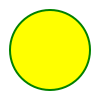

In [155]:
from IPython.display import SVG
SVG(data='''
<svg width="100" height="100">
  <circle cx="50" cy="50" r="40" stroke="green" stroke-width="2" fill="yellow" />
</svg>
''')


[Back to top](#Introduction "Back the top of the page")